#### Audio Classification Data Preprocessing

In [30]:
### Let's read a sample audio using librosa
import librosa
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import pandas as pd

audio_file_path = 'C:/Users/kboys/OneDrive/Desktop/Music-Genre-Classification-GTZAN/Data/genres_original/{file_name}'

def display_waveform(file_name):
    audio_file_path = f'C:/Users/kboys/OneDrive/Desktop/Music-Genre-Classification-GTZAN/Data/genres_original/{file_name}'
    librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

    # Original audio with 1 channel 
    plt.figure(figsize=(12, 4))
    plt.plot(librosa_audio_data)

In [15]:
def display_waveform_2(file_name):
    filename = f'C:/Users/kboys/OneDrive/Desktop/Music-Genre-Classification-GTZAN/Data/genres_original/{file_name}'
    plt.figure(figsize=(14,5))
    data,sample_rate=librosa.load(filename)
    librosa.display.waveplot(data,sr=sample_rate)
    ipd.Audio(filename)

In [5]:
# print(librosa_audio_data)

[ 0.01901245  0.04769897  0.02941895 ...  0.01318359 -0.0663147
 -0.12484741]


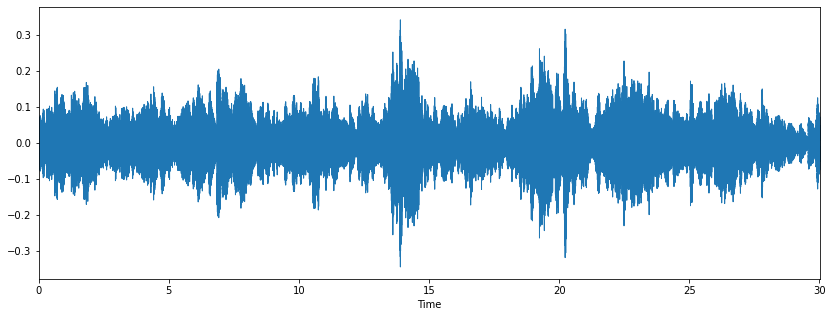

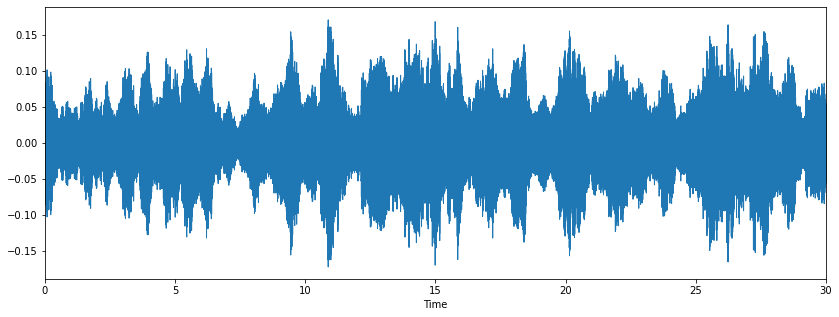

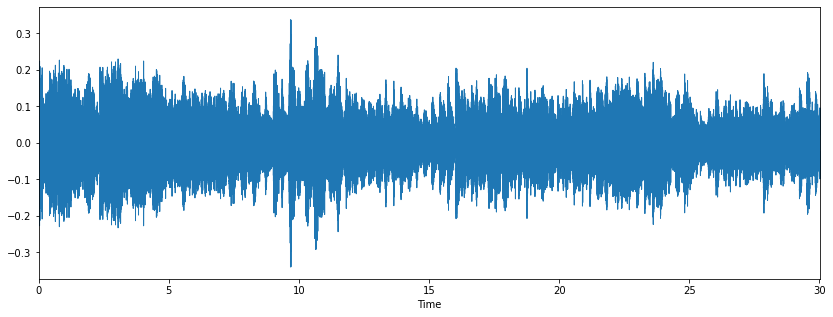

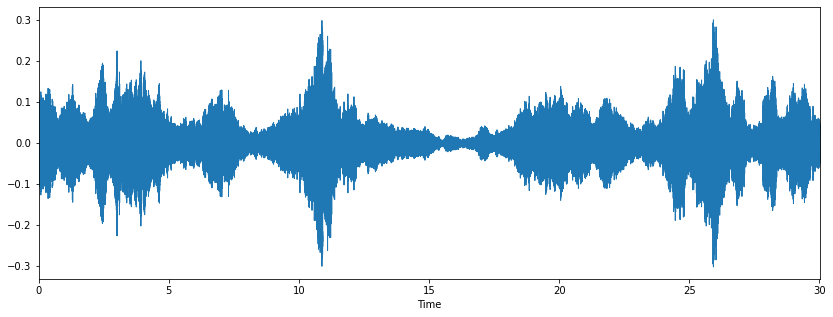

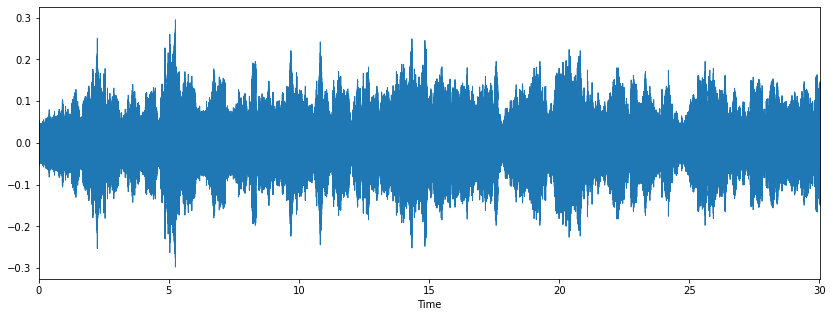

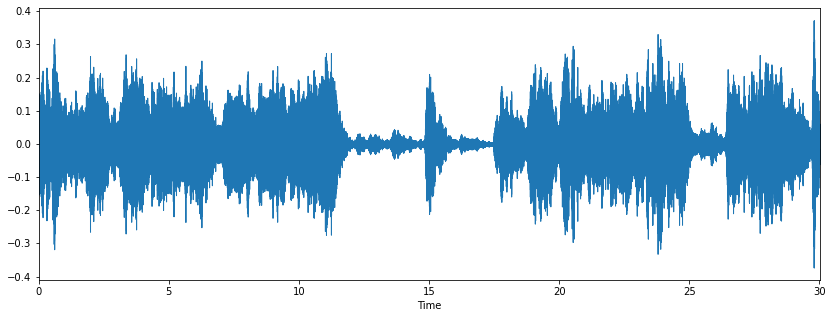

In [18]:
for i in range(6):
    display_waveform_2(f"classical/classical.0000{i}.wav")

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [24]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path.format(file_name = 'blues/blues.00002.wav')) 

In [25]:
wave_audio

array([  623,  1563,   964, ...,   432, -2173, -4091], dtype=int16)

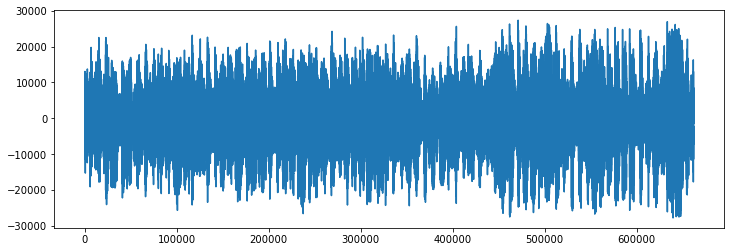

In [26]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [27]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 1293)


In [109]:
mfccs[0].shape

(1293,)

In [76]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [140]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [141]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [02:08, 27.26it/s]C:\Users\win10\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8323it [04:54, 38.45it/s]C:\Users\win10\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\win10\anaconda3\envs\tensorflow\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [05:08, 28.33it/s]


In [142]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091335,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265697,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [206]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [207]:
X.shape

(8732, 40)

In [208]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [31]:
pd.read_csv(f'C:/Users/kboys/OneDrive/Desktop/Music-Genre-Classification-GTZAN/Data/features_30_sec.csv')

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [41]:
data = pd.read_csv(f'C:/Users/kboys/OneDrive/Desktop/Music-Genre-Classification-GTZAN/Data/features_30_sec.csv')

labels = data[data.columns[-1]]
labels

features = data[data.columns[2:-1]]
features

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,1.222421e+06,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,1.046621e+06,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,8.042154e+05,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,1.332712e+06,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [43]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
labels=to_categorical(labelencoder.fit_transform(labels))

In [44]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [209]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [211]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=0)

In [46]:
X_train

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
687,0.516547,0.072241,0.267380,0.001175,3338.581900,172002.893292,2697.128636,45771.294278,6670.863091,3.556853e+05,...,8.023183,37.339474,-8.121326,33.968277,4.910113,42.063385,-2.474697,35.162354,3.192656,36.478157
500,0.344511,0.085002,0.046747,0.001542,1503.869486,554576.511533,1754.216082,283554.933422,2799.283099,2.685679e+06,...,-1.957420,50.311016,-1.503434,41.141155,0.221949,55.707256,-1.991485,50.006485,-3.353825,49.906403
332,0.368345,0.090390,0.111073,0.004402,2446.919077,490397.099115,2449.159840,215375.540632,4958.057490,2.650020e+06,...,0.122951,78.892769,-1.054999,79.877068,4.496278,112.834435,-0.978958,75.059898,-5.256925,120.275269
979,0.360042,0.083953,0.116724,0.000789,2148.410463,253618.158995,2107.165355,72155.551685,4479.264304,9.787046e+05,...,-0.621152,37.060532,-13.479134,50.848667,3.308529,47.726006,-3.704957,56.781952,1.085497,54.243389
817,0.425788,0.091852,0.139799,0.003601,1803.774378,659241.158049,1973.418903,201432.199120,3777.969679,2.632339e+06,...,3.633915,64.068756,-2.219202,99.249870,5.304260,64.088127,-6.597187,62.661850,-2.923168,67.490440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.458384,0.087093,0.073248,0.001888,1699.040890,553025.517497,2030.118821,211791.660573,3785.547102,2.854415e+06,...,0.023319,37.781624,-4.839540,38.947517,-0.706716,34.832760,-3.634985,32.705246,-2.798831,36.935303
192,0.181137,0.088510,0.084150,0.001439,1807.889891,221986.522167,1439.107302,51385.197546,3073.011245,6.415263e+05,...,-1.180370,92.862770,5.927699,117.051155,9.819752,170.975418,-2.675824,263.623291,-3.069019,457.233368
629,0.440967,0.079543,0.089029,0.000429,2954.984809,257121.128595,2478.290264,30442.108953,5928.167427,4.462161e+05,...,5.372025,37.844090,-8.105035,33.586605,6.670192,38.268536,-4.500066,40.489925,2.925767,36.995564
559,0.316408,0.101765,0.182438,0.004911,1391.473642,352844.967519,2132.913879,241449.623601,2913.813023,3.545968e+06,...,2.480978,74.687164,0.156615,80.793350,1.519130,78.074921,-1.286321,101.914078,1.407923,92.940453


In [127]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
X_train.shape

(800, 57)

In [57]:
X_test.shape

(200, 57)

In [61]:
y_train.shape

(800, 10)

In [88]:
y_test.shape

(200, 10)

### Model Creation

In [89]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [91]:
### No of classes
num_labels=y.shape[1]

In [92]:
model=Sequential()
###first layer
model.add(Dense(114,input_shape=(57,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(228))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(114))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 114)               6612      
_________________________________________________________________
activation_16 (Activation)   (None, 114)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 114)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 228)               26220     
_________________________________________________________________
activation_17 (Activation)   (None, 228)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 228)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 114)              

In [106]:
model.compile(loss=tf.keras.losses.Hinge(),metrics=['accuracy'],optimizer='sgd')

In [107]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 1000
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
16/25 [==================>...........] - ETA: 0s - loss: 1.0840 - accuracy: 0.0801
Epoch 00001: val_loss improved from inf to 1.07500, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 13ms/step - loss: 1.0815 - accuracy: 0.0925 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 2/1000
18/25 [====================>.........] - ETA: 0s - loss: 1.0813 - accuracy: 0.0938
Epoch 00002: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0825 - accuracy: 0.0875 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 3/1000
24/25 [===========================>..] - ETA: 0s - loss: 1.0810 - accuracy: 0.0951
Epoch 00003: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0810 - accuracy: 0.0950 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 4/1000
14/25 [===============>..............] - ETA: 0s - loss: 1.0808 - accuracy: 0.0960    
Epoch 00004: va

Epoch 30/1000
18/25 [====================>.........] - ETA: 0s - loss: 1.0816 - accuracy: 0.0920
Epoch 00030: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 7ms/step - loss: 1.0810 - accuracy: 0.0950 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 31/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0821 - accuracy: 0.0895
Epoch 00031: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 18ms/step - loss: 1.0818 - accuracy: 0.0913 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 32/1000
25/25 [==============================] - ETA: 0s - loss: 1.0803 - accuracy: 0.0988
Epoch 00032: val_loss did not improve from 1.07500
25/25 [==============================] - 1s 30ms/step - loss: 1.0803 - accuracy: 0.0988 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 33/1000
20/25 [=======================>......] - ETA: 0s - loss: 1.0816 - accuracy: 0.0922
Epoch 00033: val_loss did not improve from 1.07500
25/25 [============

20/25 [=======================>......] - ETA: 0s - loss: 1.0806 - accuracy: 0.0969
Epoch 00059: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 60/1000
16/25 [==================>...........] - ETA: 0s - loss: 1.0812 - accuracy: 0.0938
Epoch 00060: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0820 - accuracy: 0.0900 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 61/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0809 - accuracy: 0.0956
Epoch 00061: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 5ms/step - loss: 1.0817 - accuracy: 0.0913 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 62/1000
21/25 [========================>.....] - ETA: 0s - loss: 1.0812 - accuracy: 0.0938
Epoch 00062: val_loss did not improve from 1.07500
25/25 [============================

Epoch 89/1000
21/25 [========================>.....] - ETA: 0s - loss: 1.0821 - accuracy: 0.0893
Epoch 00089: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 90/1000
23/25 [==========================>...] - ETA: 0s - loss: 1.0813 - accuracy: 0.0938
Epoch 00090: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 3ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 91/1000
20/25 [=======================>......] - ETA: 0s - loss: 1.0806 - accuracy: 0.0969
Epoch 00091: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0820 - accuracy: 0.0900 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 92/1000
15/25 [=================>............] - ETA: 0s - loss: 1.0775 - accuracy: 0.1125
Epoch 00092: val_loss did not improve from 1.07500
25/25 [==============

21/25 [========================>.....] - ETA: 0s - loss: 1.0821 - accuracy: 0.0893
Epoch 00118: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0818 - accuracy: 0.0913 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 119/1000
18/25 [====================>.........] - ETA: 0s - loss: 1.0819 - accuracy: 0.0903
Epoch 00119: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 5ms/step - loss: 1.0815 - accuracy: 0.0925 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 120/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0801 - accuracy: 0.0993
Epoch 00120: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0810 - accuracy: 0.0950 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 121/1000
13/25 [==============>...............] - ETA: 0s - loss: 1.0822 - accuracy: 0.0889
Epoch 00121: val_loss did not improve from 1.07500
25/25 [=========================

Epoch 148/1000
23/25 [==========================>...] - ETA: 0s - loss: 1.0807 - accuracy: 0.0965
Epoch 00148: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0810 - accuracy: 0.0950 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 149/1000
15/25 [=================>............] - ETA: 0s - loss: 1.0788 - accuracy: 0.1063
Epoch 00149: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0810 - accuracy: 0.0950 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 150/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0818 - accuracy: 0.0909
Epoch 00150: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0813 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 151/1000
21/25 [========================>.....] - ETA: 0s - loss: 1.0824 - accuracy: 0.0878
Epoch 00151: val_loss did not improve from 1.07500
25/25 [==========

Epoch 178/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0820 - accuracy: 0.0901
Epoch 00178: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 179/1000
15/25 [=================>............] - ETA: 0s - loss: 1.0804 - accuracy: 0.0979
Epoch 00179: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 5ms/step - loss: 1.0813 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 180/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0794 - accuracy: 0.1029
Epoch 00180: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0800 - accuracy: 0.1000 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 181/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0812 - accuracy: 0.0938    
Epoch 00181: val_loss did not improve from 1.07500
25/25 [======

Epoch 208/1000
23/25 [==========================>...] - ETA: 0s - loss: 1.0791 - accuracy: 0.1046
Epoch 00208: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0805 - accuracy: 0.0975 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 209/1000
24/25 [===========================>..] - ETA: 0s - loss: 1.0810 - accuracy: 0.0951
Epoch 00209: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0808 - accuracy: 0.0962 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 210/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0805 - accuracy: 0.0974
Epoch 00210: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 211/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0807 - accuracy: 0.0966
Epoch 00211: val_loss did not improve from 1.07500
25/25 [==========

Epoch 238/1000
23/25 [==========================>...] - ETA: 0s - loss: 1.0810 - accuracy: 0.0951
Epoch 00238: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0810 - accuracy: 0.0950 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 239/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0818 - accuracy: 0.0909
Epoch 00239: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0815 - accuracy: 0.0925 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 240/1000
23/25 [==========================>...] - ETA: 0s - loss: 1.0829 - accuracy: 0.0856
Epoch 00240: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 241/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0765 - accuracy: 0.1176
Epoch 00241: val_loss did not improve from 1.07500
25/25 [==========

Epoch 268/1000
18/25 [====================>.........] - ETA: 0s - loss: 1.0830 - accuracy: 0.0851    
Epoch 00268: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 5ms/step - loss: 1.0815 - accuracy: 0.0925 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 269/1000
16/25 [==================>...........] - ETA: 0s - loss: 1.0793 - accuracy: 0.1035
Epoch 00269: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 5ms/step - loss: 1.0810 - accuracy: 0.0950 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 270/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0807 - accuracy: 0.0966
Epoch 00270: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 271/1000
20/25 [=======================>......] - ETA: 0s - loss: 1.0784 - accuracy: 0.1078
Epoch 00271: val_loss did not improve from 1.07500
25/25 [======

Epoch 298/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0821 - accuracy: 0.0895
Epoch 00298: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 299/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0809 - accuracy: 0.0956
Epoch 00299: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0815 - accuracy: 0.0925 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 300/1000
18/25 [====================>.........] - ETA: 0s - loss: 1.0816 - accuracy: 0.0920
Epoch 00300: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0818 - accuracy: 0.0913 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 301/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0813 - accuracy: 0.0938
Epoch 00301: val_loss did not improve from 1.07500
25/25 [==========

Epoch 328/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0801 - accuracy: 0.0993
Epoch 00328: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0820 - accuracy: 0.0900 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 329/1000
16/25 [==================>...........] - ETA: 0s - loss: 1.0828 - accuracy: 0.0859
Epoch 00329: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 330/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0820 - accuracy: 0.0901
Epoch 00330: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 331/1000
16/25 [==================>...........] - ETA: 0s - loss: 1.0820 - accuracy: 0.0898
Epoch 00331: val_loss did not improve from 1.07500
25/25 [==========

Epoch 358/1000
19/25 [=====================>........] - ETA: 0s - loss: 1.0803 - accuracy: 0.0987
Epoch 00358: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0820 - accuracy: 0.0900 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 359/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0821 - accuracy: 0.0895
Epoch 00359: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0820 - accuracy: 0.0900 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 360/1000
16/25 [==================>...........] - ETA: 0s - loss: 1.0812 - accuracy: 0.0938
Epoch 00360: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.0938 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 361/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0810 - accuracy: 0.0952
Epoch 00361: val_loss did not improve from 1.07500
25/25 [==========

Epoch 388/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0827 - accuracy: 0.0866
Epoch 00388: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0820 - accuracy: 0.0900 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 389/1000
18/25 [====================>.........] - ETA: 0s - loss: 1.0795 - accuracy: 0.1024
Epoch 00389: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0820 - accuracy: 0.0900 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 390/1000
18/25 [====================>.........] - ETA: 0s - loss: 1.0816 - accuracy: 0.0920
Epoch 00390: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0807 - accuracy: 0.0962 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 391/1000
21/25 [========================>.....] - ETA: 0s - loss: 1.0810 - accuracy: 0.0952
Epoch 00391: val_loss did not improve from 1.07500
25/25 [==========

Epoch 418/1000
19/25 [=====================>........] - ETA: 0s - loss: 1.0816 - accuracy: 0.0921
Epoch 00418: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0805 - accuracy: 0.0975 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 419/1000
16/25 [==================>...........] - ETA: 0s - loss: 1.0797 - accuracy: 0.1016
Epoch 00419: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 5ms/step - loss: 1.0805 - accuracy: 0.0975 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 420/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.0821 - accuracy: 0.0895
Epoch 00420: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0817 - accuracy: 0.0913 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 421/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0801 - accuracy: 0.0993
Epoch 00421: val_loss did not improve from 1.07500
25/25 [==========

Epoch 448/1000
21/25 [========================>.....] - ETA: 0s - loss: 1.0804 - accuracy: 0.0982    
Epoch 00448: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 5ms/step - loss: 1.0810 - accuracy: 0.0950 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 449/1000
16/25 [==================>...........] - ETA: 0s - loss: 1.0805 - accuracy: 0.0977    
Epoch 00449: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0807 - accuracy: 0.0962 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 450/1000
19/25 [=====================>........] - ETA: 0s - loss: 1.0826 - accuracy: 0.0872
Epoch 00450: val_loss did not improve from 1.07500
25/25 [==============================] - 0s 4ms/step - loss: 1.0815 - accuracy: 0.0925 - val_loss: 1.0750 - val_accuracy: 0.1250
Epoch 451/1000
23/25 [==========================>...] - ETA: 0s - loss: 1.0815 - accuracy: 0.0924
Epoch 00451: val_loss did not improve from 1.07500
25/25 [==

KeyboardInterrupt: 

In [100]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])


0.125


In [75]:
prediction_feature.shape

NameError: name 'prediction_feature' is not defined

In [190]:
X_test[1]

array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715336  ,
        -15.166929  ,  -18.850813  ,   -0.7415805 ,  -15.99989   ,
        -21.354332  ,    7.6506834 ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466884  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.9169518 ,  -18.795404  ,   -5.001721  ,
         -0.70152664,    2.91399   ,   -6.7105994 ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.6552978 ,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.419799  ,   -0.57916117,
         -1.2440346 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [185]:
model.predict_classes(X_test)

array([5, 3, 4, ..., 1, 2, 2], dtype=int64)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [215]:
filename="UrbanSound8K/drilling_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-146.34639      52.85859       6.0391283    46.972637      0.48288426
   31.756617     -6.395756     36.949165     -2.2981966     9.0149975
   -8.056831     24.668858    -14.41076       7.5845594    -3.089655
   17.423319    -10.068965      9.606158     -1.4731672     7.745292
   -1.9399884    -1.5998945     3.373213      1.6671567    -4.9514785
    4.8195934    -6.1473813     3.8730834   -10.502274      1.3417107
   -5.616546      4.815169     -6.152183      2.0756485    -1.8508396
   -0.45990178   -4.9980536     2.528911     -0.7446382    -6.4779253 ]
[[-146.34639      52.85859       6.0391283    46.972637      0.48288426
    31.756617     -6.395756     36.949165     -2.2981966     9.0149975
    -8.056831     24.668858    -14.41076       7.5845594    -3.089655
    17.423319    -10.068965      9.606158     -1.4731672     7.745292
    -1.9399884    -1.5998945     3.373213      1.6671567    -4.9514785
     4.8195934    -6.1473813     3.8730834   -10.502274      1.3417107
    -5.616546 

array(['drilling'], dtype='<U16')